## Multiple Linear Regression

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the data set
df = pd.read_csv("50_Startups.csv")

In [3]:
# show first five records
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
# input/ independent features
X = df.iloc[:, :-1]
X[:3]

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida


In [5]:
# output or target variable/ dependent features
y = df.iloc[:, 4]
y[:3]

0    192261.83
1    191792.06
2    191050.39
Name: Profit, dtype: float64

In [6]:
# in input states column will be categorical and unique value so we need to convert one hot encoding./ dummy variables.
# we drop first variable.
states = pd.get_dummies(X["State"], drop_first=True)

In [7]:
states.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [8]:
# we convert state into dummies(one hot encoding) so drop state column
x = X.drop("State", axis=1)

In [9]:
# state column drop
x.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [10]:
# concate dummy variables
X = pd.concat([x, states], axis=1)

In [11]:
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


## Splitting the dataset into the Training set and Test set

In [28]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Fitting Multiple Linear Regression to the Training set


In [14]:
# import the linear model
from sklearn.linear_model import LinearRegression

In [15]:
# LinearRegression is class so we create object 
model = LinearRegression()

In [16]:
# train the model
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Coefficient == slope ==> m
print(f"model Coefficients: {model.coef_}")

model Coefficients: [ 7.73467193e-01  3.28845975e-02  3.66100259e-02 -9.59284160e+02
  6.99369053e+02]


In [18]:
# Intercept ==> y 
print(f"model Intercept: {model.intercept_}")

model Intercept: 42554.16761773237


In [19]:
# test the model/ prediction of model
y_pred = model.predict(X_test)
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [20]:
# actual output
y_test[:5]

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
Name: Profit, dtype: float64

In [21]:
# accuracy of the train data
td = model.score(X_train, y_train) * 100
print(f"Accuracy of train data is {td}")

Accuracy of train data is 95.01847627493606


In [22]:
# accuracy of the test data
ted = model.score(X_test, y_test) * 100
print(f"Accuracy of test data is {ted}")

Accuracy of test data is 93.47068473282424


In [23]:
#Predicted accuracy
model.score(X_test, y_pred)* 100

100.0

## r^2 score

In [24]:
 from sklearn.metrics import r2_score

In [25]:
r2_score(y_test, y_pred) * 100

93.47068473282424

## Actual value and predictaed Value its difference 

In [63]:
final = pd.DataFrame({"Actual Value": y_test, "Predicted value": y_pred, "Difference": y_test - y_pred})

In [64]:
final

,Actual Value,Predicted value,Difference
28,103282.38,103015.201598,267.178402
11,144259.40,132582.277608,11677.122392
10,146121.95,132447.738452,13674.211548
41,77798.83,71976.098513,5822.731487
2,191050.39,178537.482211,12512.907789
27,105008.31,116161.242302,-11152.932302
38,81229.06,67851.692097,13377.367903
31,97483.56,98791.733747,-1308.173747
22,110352.25,113969.435330,-3617.185330
4,166187.94,167921.065696,-1733.125696


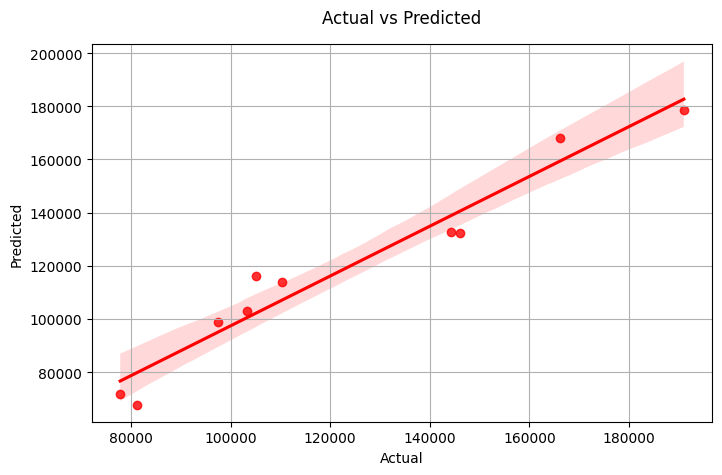

In [76]:
plt.figure(figsize=(8,5), dpi=100)
sns.regplot(x= y_test, y= y_pred, color="r")
plt.grid()
plt.title(label="Actual vs Predicted", pad= 15.2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

We can see that the r^2 score is 93.47, this the good score or prediction of model. we can increase the accuracy of model with help of techniques.